<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/Q9_NNFL_Assignment2_SoumilHooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import scipy.io
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
data = scipy.io.loadmat('/content/gdrive/MyDrive/input.mat')
data = data['x']
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
print("shape of data is: ", data.shape)
data1 = pd.DataFrame(data.T)
print("shape of data is: ",data1.shape)

shape of data is:  (1, 17160)
shape of data is:  (17160, 1)


shape of data is:  (1, 17160)
shape of data is:  (17160, 1)
shape of 1 sample is:  (12, 800)


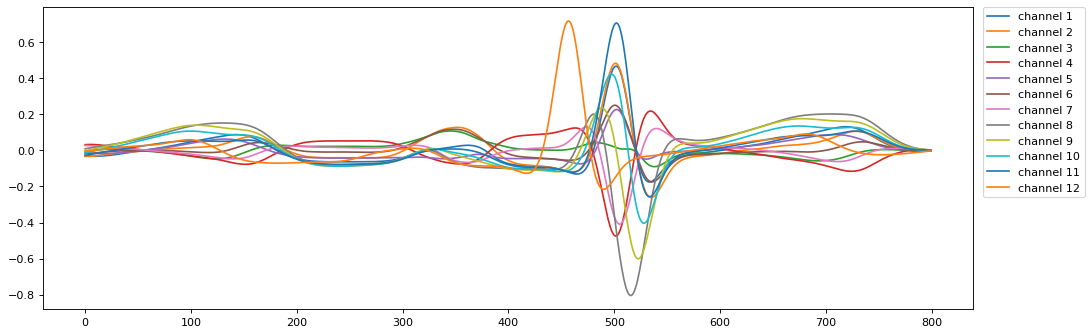

data_arr shape is:  (17160, 1)
Shape of X_arr is:  (17160, 800, 12)


In [22]:
print("shape of data is: ", data.shape)
data1 = pd.DataFrame(data.T)
print("shape of data is: ",data1.shape)
sample_1_arr = np.array(data1.iloc[0,:])[0]   
print("shape of 1 sample is: ",sample_1_arr.shape) 
x_axis = list(range(len(sample_1_arr[0])))   # list of time instances 
plt.figure(figsize=(15,5), dpi=80)           
for i in range(sample_1_arr.shape[0]):
  y_axis = list(sample_1_arr[i])
  plt.plot(x_axis, y_axis, label = "channel "+str(i+1))
plt.legend(bbox_to_anchor=(1.12, 1), loc = 'upper right', borderaxespad=0.)
plt.show()
data_arr = np.asarray(data1)
print("data_arr shape is: " , data_arr.shape)

X_arr = np.empty((data_arr.shape[0], sample_1_arr.shape[1], sample_1_arr.shape[0]))
for i in range(len(data_arr)):
  X_arr[i] = data_arr[i][0].T
print("Shape of X_arr is: ", X_arr.shape)
 

In [25]:
class_labels = scipy.io.loadmat('/content/gdrive/MyDrive/class_label.mat')
labels = class_labels['y']
print("shape of labels is: ",labels.shape)

shape of labels is:  (17160, 1)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout, Activation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [27]:
X_arr_norm = np.empty(X_arr.shape)
for i in range(len(X_arr)):
  X_arr_norm[i] = preprocessing.normalize(X_arr[i])
print("shape of X_arr_norm is: ", X_arr_norm.shape)

shape of X_arr_norm is:  (17160, 800, 12)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_arr_norm, labels, test_size = 0.2)
print("X_train shape is: ", X_train.shape)
print("y_train shape is: ", y_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (13728, 800, 12)
y_train shape is:  (13728, 1)
X_test shape is:  (3432, 800, 12)
y_test shape is:  (3432, 1)


In [29]:
def ts_model(input_shape):
  model = Sequential()
  model.add(Conv1D(20, kernel_size = (7), input_shape = input_shape, name = 'Conv1D_1'))
  model.add(MaxPool1D(pool_size = 3, strides = 3, name = 'MaxPool1D_1'))
  model.add(Activation('relu', name = 'Activation_1'))
  model.add(Conv1D(60, kernel_size = (7), name = 'Conv1D_2'))
  model.add(MaxPool1D(pool_size = 3, strides = 3, name = 'MaxPool1D_2'))
  model.add(Activation('relu', name = 'Activation_2'))
  model.add(Dropout(0.7))
  model.add(Conv1D(120, kernel_size = (7), name = 'Conv1D_3'))
  model.add(Conv1D(120, kernel_size = (7), name = 'Conv1D_4'))
  model.add(Flatten())
  model.add(Dense(2000, activation = 'relu', name = 'Dense_1'))
  model.add(Dense(700, name = 'Dense_2'))
  model.add(Dense(50, name = 'Dense_3'))
  model.add(Dense(8, activation = 'softmax', name = 'Dense_output'))

  return model

In [30]:
model = ts_model(X_arr_norm[0].shape)
print("summary of model is: ")
model.summary()

summary of model is: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 794, 20)           1700      
                                                                 
 MaxPool1D_1 (MaxPooling1D)  (None, 264, 20)           0         
                                                                 
 Activation_1 (Activation)   (None, 264, 20)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 258, 60)           8460      
                                                                 
 MaxPool1D_2 (MaxPooling1D)  (None, 86, 60)            0         
                                                                 
 Activation_2 (Activation)   (None, 86, 60)            0         
                                                                 
 dropout_1 (Dropout)         (No

In [31]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
              )


In [32]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.125)

Epoch 1/5
376/376 [==============================] - 104s 274ms/step - loss: 0.2784 - accuracy: 0.9149 - val_loss: 0.1391 - val_accuracy: 0.9592
Epoch 2/5
376/376 [==============================] - 98s 261ms/step - loss: 0.2180 - accuracy: 0.9570 - val_loss: 0.0105 - val_accuracy: 0.9959
Epoch 3/5
376/376 [==============================] - 96s 256ms/step - loss: 0.2870 - accuracy: 0.9692 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 4/5
376/376 [==============================] - 95s 252ms/step - loss: 0.0281 - accuracy: 0.9953 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 5/5
376/376 [==============================] - 96s 256ms/step - loss: 0.9313 - accuracy: 0.9445 - val_loss: 0.0012 - val_accuracy: 0.9988


In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

108/108 [==============================] - 6s 59ms/step - loss: 0.0107 - accuracy: 0.9988


In [34]:
print(f"test_accuracy is {test_accuracy*100} %")

test_accuracy is 99.8834490776062 %
